# Titanic: Machine Learning from Disaster

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.



## Goal

In this assignment, you will be asked to find insights from the data by using **pandas** to analyze and manipulate the data and **matplotlib** and **seaborn** for data visualization. You will get a bonus point if you can apply a logistic regression model to predict which passengers are more likely to survive in a separate test set. 

In [70]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

warnings.simplefilter(action='ignore', category=FutureWarning)

In [71]:
# load data
titanic = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_train.csv')
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Description of the data set
Here's a brief description of each column in the data.

- PassengerID: A column added by Kaggle to identify each row and make submissions easier
- Survived: Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)
- Pclass: The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)
- Sex: The passenger's sex
- Age: The passenger's age in years
- SibSp: The number of siblings or spouses the passenger had aboard the Titanic
- Parch: The number of parents or children the passenger had aboard the Titanic
- Ticket: The passenger's ticket number
- Fare: The fare the passenger paid
- Cabin: The passenger's cabin number
- Embarked: The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

### Find the number of missing values for each column.**
The first step in data analysis is to identify columns with missing data. Can you find the columns in this data with missing value as well as the number of records with missing value for each column?  

Hint: you will need [isna](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.isna.html) function.

In [72]:

missing_columns = titanic.columns[titanic.isna().any()].tolist()
missing_values = titanic[missing_columns].isna().sum()
# print the missing columns and the number of missing values 
print("Missing_columns",missing_columns)
print("Total Missing_values:", )
print("Missing_values:")
print(missing_values)

Missing_columns ['Age', 'Cabin', 'Embarked']
Total Missing_values:
Missing_values:
Age         177
Cabin       687
Embarked      2
dtype: int64


### **Question 2: Impute missing values.**
Now we've identified the following columns with missing values: _Age_, _Cabin_ and _Embarked_. As the next step, we want to impute those missing values. There are three ways to impute the missing values:
- A constant value that has meaning within the domain.
- The mean, median or mode value based on non-missing values of that column.
- A random value drawn from other non-missing values of that column.

Please write code to impute the missing values as follows:
- the missing values of column _age_ with the mean of that column.
- the missing values of column _Cabin_ with a constant value 'other'.
- the missing values of column _Embarked_ with the [mode](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html) of that column.

In [73]:

mean_age = titanic['Age'].mean()
titanic_updated = titanic.assign(Age=titanic.Age.fillna(mean_age))


titanic_updated = titanic_updated.assign(Cabin=titanic.Cabin.fillna('other'))


mode_embarked = titanic_updated['Embarked'].mode()[0]
titanic_updated = titanic_updated.assign(Embarked=titanic_updated.Embarked.fillna(mode_embarked))


### **Question 3: What's the name of the person who has the 16th most expensive ticket?**

In [74]:

titanic_updated
sort_Fare=titanic_updated.sort_values(by=['Fare'],ascending=False)
#sort_Fare.head(20)
sort_Fare.iloc[15]["Name"]



'Farthing, Mr. John'

### **Question 4: Out of all the remales who survived, what's the name who has the 6th most expensive ticket?**

In [75]:

filtered_titanic=titanic_updated.loc[ (titanic_updated['Sex']=='female') & (titanic_updated['Survived']==1) ]
filtered_titanic=filtered_titanic.sort_values(by=['Fare'],ascending=False)
filtered_titanic.head(10)
filtered_titanic.iloc[5]["Name"]


'Baxter, Mrs. James (Helene DeLaudeniere Chaput)'

### **Question 5: Examine the survival rate**
Calculate the survival rate for different gender and Pclass combination and use a couple of sentences to describe your findings. Hint: pivot_table is your friend.

In [76]:

titanic_updated.pivot_table('Survived', index='Sex', columns='Pclass')

'''
Findings:
According to the pivot table, female passengers have a much higher survival rate than male passengers in all Pclasses.
Pclass1 has the highest survival rate for both male and female passengers.
Females generally have higher chances of survival as compared to men irrespective of any ticket purchased.
Moreover, womens with 1st and 2nd class ticket have higher chances for survival as compared to
a women with a 3rd class ticket. Furthermore, mens with 1st class ticket have higher chances of 
survival followed by 2nd and 3rd class ticket.  '''


'\nFindings:\nAccording to the pivot table, female passengers have a much higher survival rate than male passengers in all Pclasses.\nPclass1 has the highest survival rate for both male and female passengers.\nFemales generally have higher chances of survival as compared to men irrespective of any ticket purchased.\nMoreover, womens with 1st and 2nd class ticket have higher chances for survival as compared to\na women with a 3rd class ticket. Furthermore, mens with 1st class ticket have higher chances of \nsurvival followed by 2nd and 3rd class ticket.  '

### **Question 6: Is Age or Fare an important factor to one's chance of survival?**
Visualize the distribution of Column _Age_ for both survived and non-survived population and write down your findings based on the visualization.

<AxesSubplot:xlabel='Fare', ylabel='Age'>

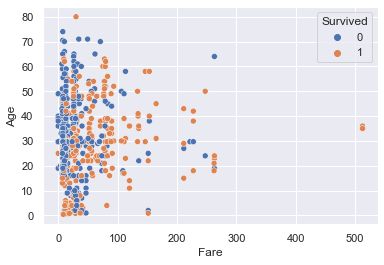

In [77]:

sns.scatterplot(data=titanic_updated, x="Fare", y="Age", hue="Survived")


In [78]:
'''
#Findings:
Fare is an important feature and it is likely that passengers who paid higher fares 
had a better chance of survival. This can be seen by comparing the survival rates of various fare groups. 
Passengers who paid higher fares, for example, had a better chance of survival, 
as we can see as the fare starts increasing there are very more survival.
Age too is an next important factor; children under the age of 10-15 had a higher chance of survival 
than other age groups.'''

'\n#Findings:\nFare is an important feature and it is likely that passengers who paid higher fares \nhad a better chance of survival. This can be seen by comparing the survival rates of various fare groups. \nPassengers who paid higher fares, for example, had a better chance of survival, \nas we can see as the fare starts increasing there are very more survival.\nAge too is an next important factor; children under the age of 10-15 had a higher chance of survival \nthan other age groups.'

### **Question 7: Calculate and visualize the survival rate for discrete columns**
- Calculate the survival rate for column _SibSp_ and _Parch_.
- Use sns.barplot to visualize the survival rate for column _SibSp_ and _Parch_.

In [79]:
sibsp_survival = titanic_updated.groupby("SibSp")["Survived"].mean()
print(sibsp_survival)

# Calculating the survival rate for Parch
parch_survival = titanic_updated.groupby("Parch")["Survived"].mean()
print(parch_survival)

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


<AxesSubplot:xlabel='Parch', ylabel='Survived'>

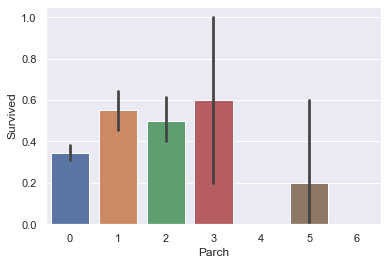

In [80]:

sns.barplot(data=titanic_updated, x="Parch", y="Survived")


<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

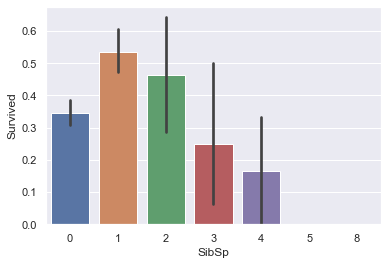

In [81]:
sns.barplot(data=titanic_updated, x="SibSp", y="Survived")


### Find the correlations.**
Find the correlations between the feature and the target variable _Survived_ and use heatmap to visualize it. Summarize your findings.

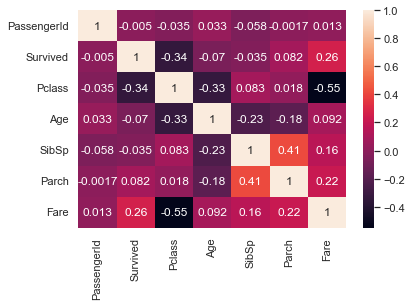

In [82]:
corr = titanic_updated.corr()
#sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
sns.heatmap(corr, annot=True)
plt.show()

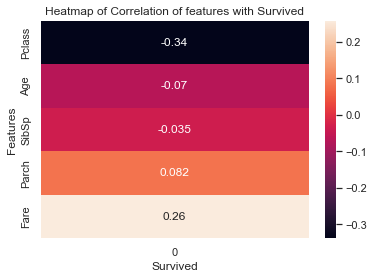

In [83]:

# Select features and target
features = titanic_updated.drop(columns=["Survived", "PassengerId"])
target = titanic_updated["Survived"]

# Calculate the correlation matrix
corr = features.corrwith(target)

sns.heatmap(corr.to_frame(),annot=True)
plt.title('Heatmap of Correlation of features with Survived')
plt.ylabel('Features')
plt.xlabel('Survived')

plt.show()

In [84]:
'''
#Findings:
The heatmap shows that the feature 'Pclass' has the highest negative correlation with the target variable 'Survived'(-0.33) 
and the feature 'Fare' has the highest positive correlation with 'Survived' (0.25). 
It means that the chances of survival are higher for passengers who paid a higher fare and 
lower for passengers who paid a lower fare.
It's also worth noting that other characteristics like 'Sex' and 'Embarked' 
have a moderate correlation with the target variable 'Survived'. 
In summary, the features 'Pclass,' 'Fare,' 'Sex,' and 'Embarked' in the Titanic dataset 
are moderately correlated with the target variable 'Survived,' with 'Fare' having the highest positive correlation
and 'Pclass' having the highest negative correlation'''

"\n#Findings:\nThe heatmap shows that the feature 'Pclass' has the highest negative correlation with the target variable 'Survived'(-0.33) \nand the feature 'Fare' has the highest positive correlation with 'Survived' (0.25). \nIt means that the chances of survival are higher for passengers who paid a higher fare and \nlower for passengers who paid a lower fare.\nIt's also worth noting that other characteristics like 'Sex' and 'Embarked' \nhave a moderate correlation with the target variable 'Survived'. \nIn summary, the features 'Pclass,' 'Fare,' 'Sex,' and 'Embarked' in the Titanic dataset \nare moderately correlated with the target variable 'Survived,' with 'Fare' having the highest positive correlation\nand 'Pclass' having the highest negative correlation"

### **Question 9: Any other insights do you draw by analyzing the data? Summarize the findings as well as provide the code leading you to the findings.**

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

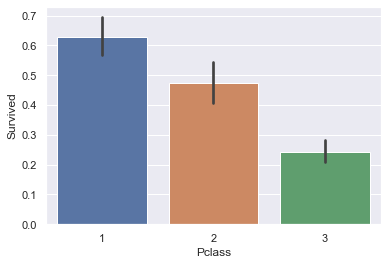

In [85]:

sns.barplot(data=titanic_updated, x="Pclass", y="Survived")

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

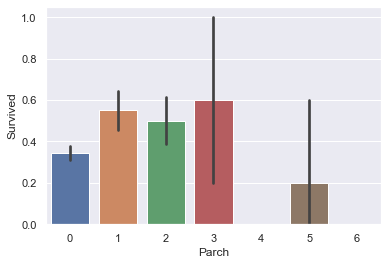

In [86]:
sns.barplot(data=titanic_updated, x="Parch", y="Survived")

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

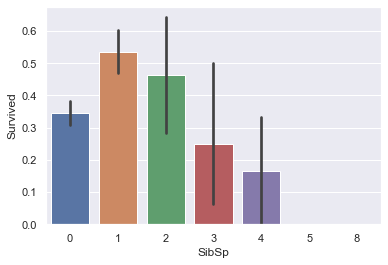

In [87]:
sns.barplot(data=titanic_updated, x="SibSp", y="Survived")

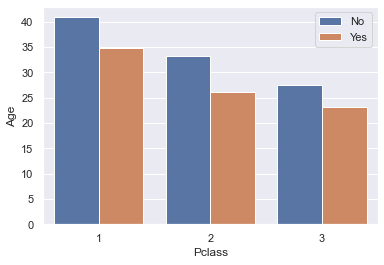

In [88]:
sns.barplot(x='Pclass', y='Age', hue='Survived',hue_order=[0, 1], data=titanic_updated, ci=None, )
plt.legend(labels=["No", "Yes"])

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

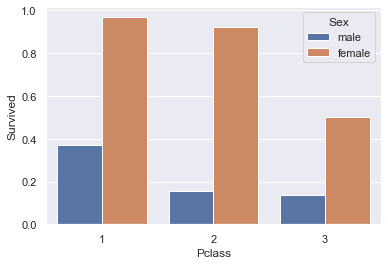

In [89]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_updated, ci=None)

In [90]:
'''
#Findings:
As we can see from the above graph, females coming from any Pclass had higher chances of survival as compared to mens.
People with high Pclass(1st) were higher edge to survive as compared to other Pclass(2nd and 3rd)
People with one sibling/spouse and three Parch have higher chances of survival. 
It is evident from the graph above that children, women, higher Pclass people had the higher 
chances of survival as compared to other'''


'\n#Findings:\nAs we can see from the above graph, females coming from any Pclass had higher chances of survival as compared to mens.\nPeople with high Pclass(1st) were higher edge to survive as compared to other Pclass(2nd and 3rd)\nPeople with one sibling/spouse and three Parch have higher chances of survival. \nIt is evident from the graph above that children, women, higher Pclass people had the higher \nchances of survival as compared to other'

### **Build a ML model to predict survival.**
Building a logistic regression model to predict the probability of survival for all the passengers in this [file](https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv)? Evaluating your model accuracy on [Kaggle](https://www.kaggle.com/c/titanic). 

In [91]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/titanic_test.csv')

features = titanic_updated.drop(columns=["Survived", "PassengerId"])
target = titanic_updated["Survived"]

features = pd.get_dummies(features)


# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=90)

# print(X_train)

#passenger_id = X_test["PassengerId"]
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)



# test_data = pd.read_csv("/Users/himeshk/Desktop/_COLLEGE/WINTER QUARTER/522(Advanced data mining)-Yu/Assi1/kaggle_dataset.csv")

# features = test_data.drop(columns=["PassengerId"])
# target = test_data["Survived"]
# # print(len(features), len(X_train))
# test_X_train, test_X_test, test_Y_train, test_Y_test = train_test_split(features, target, test_size=0, random_state=90)
# print(X_train)
# print(test_X_train)
# PassengerId_test= test_data["PassengerId"]

# y_pred = model.predict(features)





/Users/himeshk/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [92]:
'''Several things can be done to improve the model's performance:

1.Tuning the model's hyperparameters: You can change the model's parameters to improve its performance.
2.Feature engineering: we can have new features from existing data to provide more information to the model.
3.Ensemble methods: these actually combine multiple of the models to produce a more robust and accurate prediction.
4.Using another algorithm: we can compare the performance of other algorithms such as Random Forest, SVM, Neural Network, logistic regression.
5.Adding external data: You can include external data'''

"Several things can be done to improve the model's performance:\n\n1.Tuning the model's hyperparameters: You can change the model's parameters to improve its performance.\n2.Feature engineering: we can have new features from existing data to provide more information to the model.\n3.Ensemble methods: these actually combine multiple of the models to produce a more robust and accurate prediction.\n4.Using another algorithm: we can compare the performance of other algorithms such as Random Forest, SVM, Neural Network, logistic regression.\n5.Adding external data: You can include external data"